# Schooling in Xenopus tadpoles

Data processor

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
%pwd

'C:\\Users\\khakh\\Documents\\Projects\\Xenopus Behavior\\Xenopus-Behavior-GIT\\01 Schooling'

In [63]:
d = pd.read_csv('data/control.csv')
d.columns = ['Tad']+[d.columns[i].replace(' ','') for i in range(1,len(d.columns))] # Remove spaces in column names
print(d[:5])

   Tad  Area  Min  Min  Max      X       Y
0    1     0  215  215  215  7.391  14.783
1    2     0  128  128  128  7.232  14.643
2    3     0  239  239  239  8.850  14.623
3    4     0  156  156  156  8.670  14.443
4    5     0  236  236  236  7.751  12.426


Standard ImageJ format. X and Y are coordinates; every odd row is a tadpole head; every odd row is a tail. The first row goes from 1 to 2n (where n is the number of tadpoles in each frame), then starts anew. There is no frame counter.

In [90]:
d['Frame'] = 0
for i in range(1,d.shape[0]):
    if d.loc[i,'Tad']<d.loc[i-1,'Tad']:
        d.loc[i,'Frame'] = d.loc[i-1,'Frame']+1
    else:
        d.loc[i,'Frame'] = d.loc[i-1,'Frame']
# Note that d['Frame'][i] wouldn't have worked because of chain slicing: applying 2nd slice after the 1st would
# have created a copy of the dataframe, and so wouldn't have transformed the original dataframe

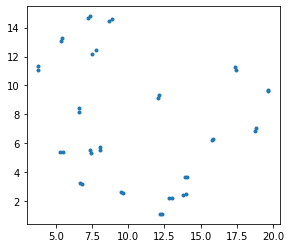

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(d.loc[d.Frame==0,'X'],d.loc[d.Frame==0,'Y'],'.');
ax.set_aspect('equal')